# Incidental learning of rewarded associations bolsters learning on an associative task

Reward has been shown to change behavior as a result of incentive learning (by motivating the individual to increase their effort) and instrumental learning (by increasing the frequency of a particular behavior). However, Palminteri et al. (2011) demonstrated that reward can also improve the incidental learning of a motor skill even when participants are unaware of the relationship between the reward and the motor act. Nonetheless, it remains unknown whether these effects of reward are the indirect results of manipulations of top–down factors. To identify the locus of the benefit associated with rewarded incidental learning, we used a chord-learning task (Seibel, 1963) in which the correct performance of some chords was consistently rewarded with points necessary to complete the block whereas the correct performance of other chords was not rewarded. Following training, participants performed a transfer phase without reward and then answered a questionnaire to assess explicit awareness about the rewards. Experiment 1 revealed that rewarded chords were performed more quickly than unrewarded chords, and there was little awareness about the relationship between chords and reward. Experiment 2 obtained similar findings with simplified responses to show that the advantage for rewarded stimulus combinations reflected more efficient binding of stimulus–response (S-R) associations, rather than a response bias for rewarded associations or improved motor learning. These results indicate that rewards can be used to significantly improve the learning of S-R associations without directly manipulating top–down factors. (PsycINFO Database Record (c) 2016 APA, all rights reserved)

Experimental Design 10 Blocks: Training (8 blocks) Transfer (1 block) Questionnaire (1 block)

Hypothesis: Patients with PD will show a significantly lower effect of reward on learning than comparisons.

Participants responded to a pair of stimuli (faces) shown on a computer screen with either the right index or middle finger. During the eight training blocks, half of the  pairs yielded a reward (money) if the participant responded with the correct answer within the 5 second trial limit. The remaining pairs only yielded positive feedback ("correct") if performed correctly within the time limit. Incorrect or late repsonses yielded negative feedback ("incorrect"). The sole transfer block was identical to the training blocks except that feedback and rewards were withheld. Following the transfer block, participants were presented with an explicit memory questionnaire, which included two parts. For the first part, participants were asked to judge their confidence identifying which pairs were likely to yield rewards on a scale between 0 (no confidence) and 9 (full confidence). For the second part, participants were asked to label each stimulus pair as either rewarded or unrewarded and the number of correct responses (out of 8) was recorded.

## Data Dictionary
| Column | Definition |
| ------ | ---------- |
| Subject | Subject ID |
| Sex | Sex of participant (1 = female, 2 = male) |
| rmapping | Counterbalancing group related to mapping of responses to stimuli |
| CB | Counterbalancing group that includes rmapping and mapping of stimulus sets to screen side (left or right) |
| RT | Time (in milliseconds) to respond on each trial |
| Acc | Binary variable (0 or 1) indicating the accuracy of the repsonse |
| Block | Experiment block where (2 = practice block, 3-10 = training blocks with rewards, 11 = transfer block with no rewarded, 12 = explicit memory questionnaire) |
| Trial | Trial number for each block |
| F1 | Stimulus picture presented on the left side of the screen |
| F2 | Stimulus picture presented on the right side of the screen |
| Resp | Participant response (1 or 2) |
| Chord | Two digit number combining the stimulus numbers for the left and right pictures |
| CResp | Correct response for each trial |
| RewardType | Variable indicating whether the pair of pictures shown will yeild a monetary reward if the participant is correct during the training blocks (0 or 1) |
| Rewarded | Variable indicating whether the participant received a reward on that trial (0 or 1) |
| PrevReward | Indicates whether the participant received a reward on the previous trial (0 or 1) |
| AfterReward | Indicates the RewardType of the previous trial stimulus pair (0 or 1) |
| PrevAcc | Indicates the accuracy of the previous trial |
| GoodFast | Indicates whether the response time of the trial is acceptable (above 300 ms and below 2000 ms; 0 or 1) |
| Repeats | Indicates whether the current trial includes the same pair of stimuli as the previous trial |
| Useable | Indicates whether the current and previous trial were performed accurately, within the 300-2000 ms window, and were not repeats (0 or 1). |
| Qchord | Stimulus pair shown during the explicit memory questionnaire. |
| Qconf | Participant's self-reported confidence (from 0 to 9) in identifying stimulus pairs that were rewarded during training, where 0 equals no confidence and 9 indicates full confidence.  |
| QRecall | Accuracy on recall phase of explicit memory questionnaire (8 total trials per participant; 0 or 1) |
| QRespQ | Response (y or n) on recall phase of explicit memory questionnaire. |
| Composite Awareness | Metric of participant's explicit memory for rewarded stimulus pairs (ranges from 0 to 2, where 0 equals poor explicit memory and 2 equals full explicit memory) |

## Importing Libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
df = pd.read_csv('~/Desktop/Incidental_Rewarded_Learning_Exp2.csv')
df_nr = df.copy()
df_nr.drop(df[df['Subject'] == 36].index, inplace=True) # Remove subject 36

### Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# First five rows
df_nr.head()

,Subject,Sex,rmapping,CB,RT,Acc,Block,Trial,F1,F2,...,AfterReward,PrevAcc,GoodFast,Repeats,Useable,Qchord,Qconf,QRecall,QRespQ,Composite Awareness
0,1,1,1,1,0.0,0.0,1,1,Face4.jpg,Face8.jpg,...,0,1,0,0,0,NaN,NaN,NaN,NaN,0.708333
1,1,1,1,1,1048.0,1.0,1,2,Face1.jpg,Face5.jpg,...,0,0,1,0,0,NaN,NaN,NaN,NaN,0.708333
2,1,1,1,1,1212.0,1.0,1,3,Face1.jpg,Face5.jpg,...,0,1,1,1,0,NaN,NaN,NaN,NaN,0.708333
3,1,1,1,1,1518.0,0.0,1,4,Face3.jpg,Face8.jpg,...,0,1,1,0,1,NaN,NaN,NaN,NaN,0.708333
4,1,1,1,1,1325.0,1.0,1,5,Face1.jpg,Face7.jpg,...,0,0,1,0,0,NaN,NaN,NaN,NaN,0.708333


In [ ]:
# Last five rows
df_nr.tail()

,Subject,Sex,rmapping,CB,RT,Acc,Block,Trial,F1,F2,...,AfterReward,PrevAcc,GoodFast,Repeats,Useable,Qchord,Qconf,QRecall,QRespQ,Composite Awareness
30802,9,1,5,9,NaN,NaN,12,4,Face1.jpg,Face5.jpg,...,0,1,0,0,0,15.0,0.0,0.0,y,0.75
30803,9,1,5,9,NaN,NaN,12,5,Face1.jpg,Face7.jpg,...,0,1,0,0,0,17.0,0.0,0.0,n,0.75
30804,9,1,5,9,NaN,NaN,12,6,Face4.jpg,Face8.jpg,...,0,1,0,0,0,48.0,0.0,1.0,y,0.75
30805,9,1,5,9,NaN,NaN,12,7,Face2.jpg,Face5.jpg,...,0,1,0,0,0,25.0,0.0,1.0,y,0.75
30806,9,1,5,9,NaN,NaN,12,8,Face4.jpg,Face6.jpg,...,0,1,0,0,0,46.0,0.0,1.0,n,0.75


In [ ]:
# Data frame shape
print("There are ", df_nr.shape[0], " rows and ", df_nr.shape[1], " columns in the dataset.")

There are  29958  rows and  26  columns in the dataset.


In [ ]:
# Data frame information
df_nr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29958 entries, 0 to 30806
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Subject              29958 non-null  int64  
 1   Sex                  29958 non-null  int64  
 2   rmapping             29958 non-null  int64  
 3   CB                   29958 non-null  int64  
 4   RT                   29589 non-null  float64
 5   Acc                  29589 non-null  float64
 6   Block                29958 non-null  int64  
 7   Trial                29958 non-null  int64  
 8   F1                   29958 non-null  object 
 9   F2                   29958 non-null  object 
 10  Resp                 29531 non-null  float64
 11  Chord                29957 non-null  float64
 12  CResp                29589 non-null  float64
 13  RewardType           29958 non-null  int64  
 14  Rewarded             29958 non-null  int64  
 15  PrevReward           29958 non-null  int6

In [ ]:
# Statistical summary
df_nr.describe().T

,count,mean,std,min,25%,50%,75%,max
Subject,29958.0,24.606749,14.190787,1.00,12.00,24.000000,38.000000,49.00
Sex,29958.0,1.263970,0.440790,1.00,1.00,1.000000,2.000000,2.00
rmapping,29958.0,4.244709,2.303832,1.00,2.00,4.000000,6.000000,8.00
CB,29958.0,8.502937,4.717189,1.00,4.00,9.000000,13.000000,16.00
RT,29589.0,1147.104431,568.082534,0.00,788.00,1054.000000,1406.000000,4923.00
Acc,29589.0,0.716381,0.450762,0.00,0.00,1.000000,1.000000,1.00
Block,29958.0,5.618633,3.263617,1.00,3.00,5.000000,8.000000,12.00
Trial,29958.0,31.041091,20.502629,0.00,14.00,29.000000,44.000000,128.00
Resp,29531.0,1.490603,0.499920,1.00,1.00,1.000000,2.000000,2.00
Chord,29957.0,49.722135,21.285772,15.00,35.00,51.000000,71.000000,84.00


In [ ]:
# Check for null values
print(df_nr.isnull().sum())
print("There are", df_nr.isnull().sum().sum(), "null values.") # No null values

Subject                    0
Sex                        0
rmapping                   0
CB                         0
RT                       369
Acc                      369
Block                      0
Trial                      0
F1                         0
F2                         0
Resp                     427
Chord                      1
CResp                    369
RewardType                 0
Rewarded                   0
PrevReward                 0
AfterReward                0
PrevAcc                    0
GoodFast                   0
Repeats                    0
Useable                    0
Qchord                 29590
Qconf                  29590
QRecall                29590
QRespQ                 29590
Composite Awareness     1506
dtype: int64
There are 121401 null values.


In [ ]:
# Check for duplicated rows
print("There are", df_nr.duplicated().sum(), "duplicated rows.") # No duplicate rows

There are 0 duplicated rows.


## Training - RT

In [ ]:
# Only include blocks 2-9
Training_df = df_nr[(df_nr['Block'] <= 9) & (df_nr['Block'] >= 2)]

In [ ]:
# Clean data
Training_df_clean_RT = Training_df[(Training_df['Acc'] == 1) & (Training_df['PrevAcc'] == 1) & (Training_df['GoodFast'] == 1) & (Training_df['Repeats'] == 0)];

In [ ]:
# Create data sets for rewarded and unrewarded RTs
Reward_train_m_rt = Training_df_clean_RT[Training_df_clean_RT['RewardType'] == 1].groupby('Block')['RT'].mean()
NoReward_train_m_rt = Training_df_clean_RT[Training_df_clean_RT['RewardType'] == 0].groupby('Block')['RT'].mean()
Reward_train_s_rt = Training_df_clean_RT[Training_df_clean_RT['RewardType'] == 1].groupby('Block')['RT'].std()
NoReward_train_s_rt = Training_df_clean_RT[Training_df_clean_RT['RewardType'] == 0].groupby('Block')['RT'].std()
R_sem_train_rt = Reward_train_s_rt / np.sqrt(df_nr['Subject'].unique().size)
NR_sem_train_rt = NoReward_train_s_rt / np.sqrt(df_nr['Subject'].unique().size)

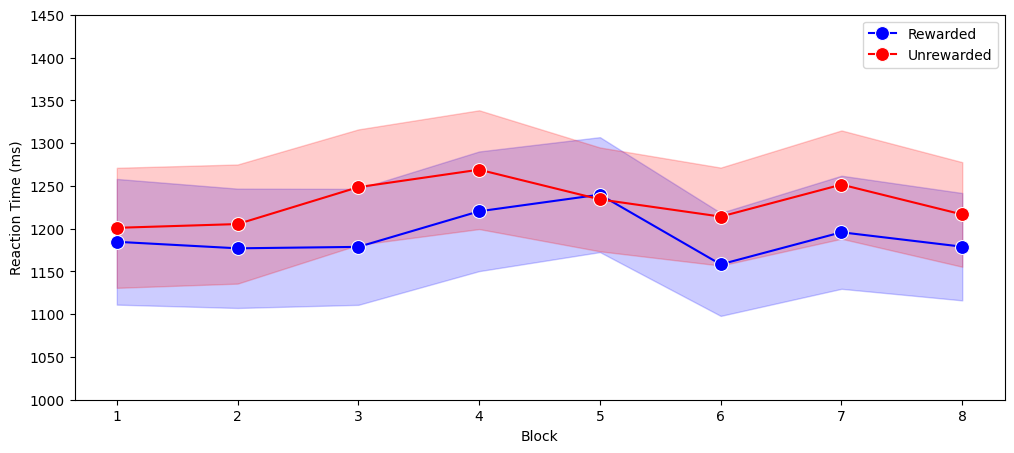

In [ ]:
# Training data (RT) Plot
Training_plot_RT_df = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': Reward_train_m_rt, 'Unrewarded': NoReward_train_m_rt})

plt.figure(figsize=(12,5))
# Multiple lines with hue
sns.lineplot(x='Block',
             y='Rewarded',
             data=Training_plot_RT_df,
             label='Rewarded',
             marker='o',
             markersize=10,
             markerfacecolor='Blue',
             color='Blue',
             linestyle='-'
);

sns.lineplot(x='Block',
             y='Unrewarded',
             data=Training_plot_RT_df,
             label='Unrewarded',
             marker='o',
             markersize=10,
             markerfacecolor='Red',
             color='Red',
             linestyle='-'
);

# Shaded error bars
plt.fill_between(np.arange(1,9,1), Reward_train_m_rt - R_sem_train_rt, Reward_train_m_rt + R_sem_train_rt, color='b', alpha=0.2);
plt.fill_between(np.arange(1,9,1), NoReward_train_m_rt - NR_sem_train_rt, NoReward_train_m_rt + NR_sem_train_rt, color='r', alpha=0.2);
plt.xlabel('Block');
plt.ylabel('Reaction Time (ms)');
plt.ylim(1000, 1450);

## Training - Accuracy

In [ ]:
# Create data set for accuracy training data
Training_df_clean_Acc = Training_df[(Training_df['PrevAcc'] == 1) & (Training_df['GoodFast'] == 1) & (Training_df['Repeats'] == 0)];

In [ ]:
# Create data sets for rewarded and unrewarded Accs
Reward_train_m_acc = Training_df_clean_Acc[Training_df_clean_Acc['RewardType'] == 1].groupby('Block')['Acc'].mean()
NoReward_train_m_acc = Training_df_clean_Acc[Training_df_clean_Acc['RewardType'] == 0].groupby('Block')['Acc'].mean()
Reward_train_s_acc = Training_df_clean_Acc[Training_df_clean_Acc['RewardType'] == 1].groupby('Block')['Acc'].std()
NoReward_train_s_acc = Training_df_clean_Acc[Training_df_clean_Acc['RewardType'] == 0].groupby('Block')['Acc'].std()
R_sem_train_acc = NoReward_train_s_acc / np.sqrt(df_nr['Subject'].unique().size)
NR_sem_train_acc = NoReward_train_s_acc / np.sqrt(df_nr['Subject'].unique().size)

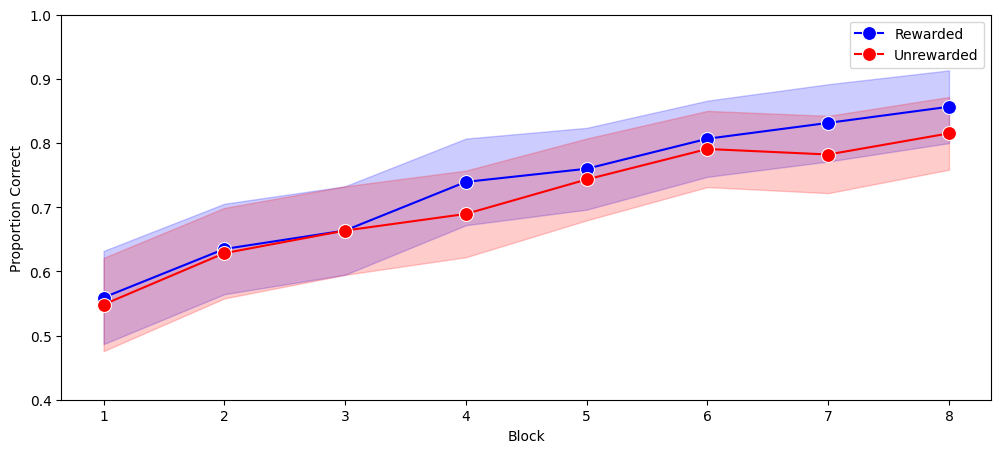

In [ ]:
# Training data (RT) Plot
Training_plot_Acc_df = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': Reward_train_m_acc, 'Unrewarded': NoReward_train_m_acc})

plt.figure(figsize=(12,5))
# Multiple lines with hue
sns.lineplot(x='Block',
             y='Rewarded',
             data=Training_plot_Acc_df,
             label='Rewarded',
             marker='o',
             markersize=10,
             markerfacecolor='Blue',
             color='Blue',
             linestyle='-'
);

sns.lineplot(x='Block',
             y='Unrewarded',
             data=Training_plot_Acc_df,
             label='Unrewarded',
             marker='o',
             markersize=10,
             markerfacecolor='Red',
             color='Red',
             linestyle='-'
);

# Shaded error bars
plt.fill_between(np.arange(1,9,1), Reward_train_m_acc - R_sem_train_acc, Reward_train_m_acc + R_sem_train_acc, color='b', alpha=0.2);
plt.fill_between(np.arange(1,9,1), NoReward_train_m_acc - NR_sem_train_acc, NoReward_train_m_acc + NR_sem_train_acc, color='r', alpha=0.2);
plt.xlabel('Block');
plt.ylabel('Proportion Correct');
plt.ylim(0.4, 1);

### After Rewarded RT

In [ ]:
# Create data sets for rewarded and unrewarded RTs
Reward_after_m_rt = Training_df_clean_RT[Training_df_clean_RT['AfterReward'] == 1].groupby('Block')['RT'].mean()
NoReward_after_m_rt = Training_df_clean_RT[Training_df_clean_RT['AfterReward'] == 0].groupby('Block')['RT'].mean()
Reward_after_s_rt = Training_df_clean_RT[Training_df_clean_RT['AfterReward'] == 1].groupby('Block')['RT'].std()
NoReward_after_s_rt = Training_df_clean_RT[Training_df_clean_RT['AfterReward'] == 0].groupby('Block')['RT'].std()
R_after_sem = Reward_after_s_rt / np.sqrt(df_nr['Subject'].unique().size)
NR_after_sem = NoReward_after_s_rt / np.sqrt(df_nr['Subject'].unique().size)

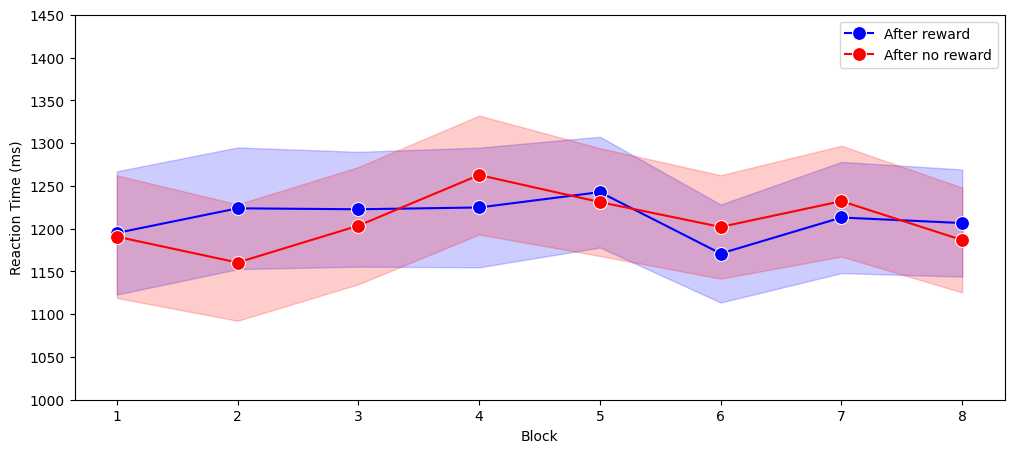

In [ ]:
# Training data (RT) Plot
Training_plot_RT_after = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': Reward_after_m_rt, 'Unrewarded': NoReward_after_m_rt})

plt.figure(figsize=(12,5))
# Multiple lines with hue
sns.lineplot(x='Block',
             y='Rewarded',
             data=Training_plot_RT_after,
             label='After reward',
             marker='o',
             markersize=10,
             markerfacecolor='Blue',
             color='Blue',
             linestyle='-'
);

sns.lineplot(x='Block',
             y='Unrewarded',
             data=Training_plot_RT_after,
             label='After no reward',
             marker='o',
             markersize=10,
             markerfacecolor='Red',
             color='Red',
             linestyle='-'
);

# Shaded error bars
plt.fill_between(np.arange(1,9,1), Reward_after_m_rt - R_after_sem, Reward_after_m_rt + R_after_sem, color='b', alpha=0.2);
plt.fill_between(np.arange(1,9,1), NoReward_after_m_rt - NR_after_sem, NoReward_after_m_rt + NR_after_sem, color='r', alpha=0.2);
plt.xlabel('Block');
plt.ylabel('Reaction Time (ms)');
plt.ylim(1000, 1450);

### After Reward Acc

In [ ]:
# Create data sets for rewarded and unrewarded Acc
Reward_after_m_acc = Training_df_clean_Acc[Training_df_clean_Acc['AfterReward'] == 1].groupby('Block')['Acc'].mean()
NoReward_after_m_acc = Training_df_clean_Acc[Training_df_clean_Acc['AfterReward'] == 0].groupby('Block')['Acc'].mean()
Reward_after_s_acc = Training_df_clean_Acc[Training_df_clean_Acc['AfterReward'] == 1].groupby('Block')['Acc'].std()
NoReward_after_s_acc = Training_df_clean_Acc[Training_df_clean_Acc['AfterReward'] == 0].groupby('Block')['Acc'].std()
R_after_sem_acc = Reward_after_s_acc / np.sqrt(df_nr['Subject'].unique().size)
NR_after_sem_acc = NoReward_after_s_acc / np.sqrt(df_nr['Subject'].unique().size)

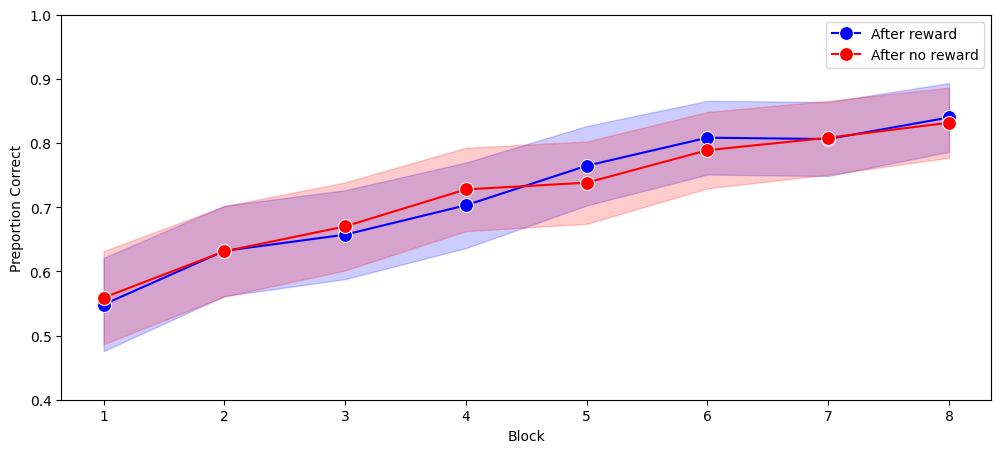

In [ ]:
# Training data (Acc) Plot
Training_plot_Acc_after = pd.DataFrame({'Block': np.arange(1,9,1), 'Rewarded': Reward_after_m_acc, 'Unrewarded': NoReward_after_m_acc})

plt.figure(figsize=(12,5))
# Multiple lines with hue
sns.lineplot(x='Block',
             y='Rewarded',
             data=Training_plot_Acc_after,
             label='After reward',
             marker='o',
             markersize=10,
             markerfacecolor='Blue',
             color='Blue',
             linestyle='-'
);

sns.lineplot(x='Block',
             y='Unrewarded',
             data=Training_plot_Acc_after,
             label='After no reward',
             marker='o',
             markersize=10,
             markerfacecolor='Red',
             color='Red',
             linestyle='-'
);

# Shaded error bars
plt.fill_between(np.arange(1,9,1), Reward_after_m_acc - R_after_sem_acc, Reward_after_m_acc + R_after_sem_acc, color='b', alpha=0.2);
plt.fill_between(np.arange(1,9,1), NoReward_after_m_acc - NR_after_sem_acc, NoReward_after_m_acc + NR_after_sem_acc, color='r', alpha=0.2);
plt.xlabel('Block');
plt.ylabel('Preportion Correct');
plt.ylim(0.4, 1);

## Transfer RT

In [ ]:
# Only include block 10 and clean data
Transfer_df = df_nr[(df_nr['Block'] == 10)]
Transfer_df_clean_RT =Transfer_df[(Transfer_df['GoodFast'] == 1) & (Transfer_df['Acc'] == 1)];
Transfer_df_clean_RT.head()

,Subject,Sex,rmapping,CB,RT,Acc,Block,Trial,F1,F2,...,AfterReward,PrevAcc,GoodFast,Repeats,Useable,Qchord,Qconf,QRecall,QRespQ,Composite Awareness
474,1,1,1,1,1384.0,1.0,10,1,Face4.jpg,Face8.jpg,...,1,1,1,0,1,NaN,NaN,NaN,NaN,0.708333
475,1,1,1,1,1452.0,1.0,10,2,Face1.jpg,Face5.jpg,...,0,1,1,0,1,NaN,NaN,NaN,NaN,0.708333
476,1,1,1,1,1051.0,1.0,10,3,Face2.jpg,Face5.jpg,...,0,1,1,0,1,NaN,NaN,NaN,NaN,0.708333
477,1,1,1,1,1428.0,1.0,10,4,Face2.jpg,Face7.jpg,...,0,1,1,0,1,NaN,NaN,NaN,NaN,0.708333
478,1,1,1,1,1295.0,1.0,10,5,Face1.jpg,Face7.jpg,...,0,1,1,0,1,NaN,NaN,NaN,NaN,0.708333


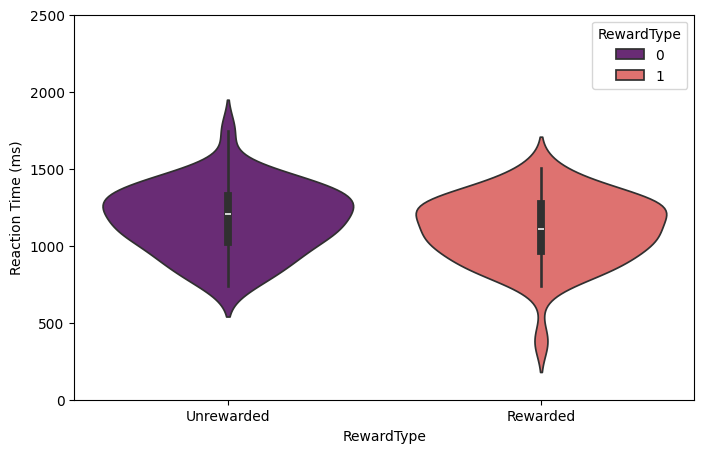

In [ ]:
# Create data sets for rewarded and unrewarded RTs
plt.figure(figsize=(8,5))
plot_data = Transfer_df_clean_RT.groupby(['RewardType','Subject'])['RT'].mean().reset_index()

ax = sns.violinplot(x='RewardType', y='RT', hue = 'RewardType',data=plot_data, palette='magma');

Mns = Transfer_df_clean_RT.groupby(['RewardType','Subject'])['RT'].mean()
# Calculate and plot means
means = Transfer_df_clean_RT.groupby(['RewardType','Subject'])['RT'].mean()

# Reorder means
means = means.reindex(['U', 'W','R'])

for i, mean in enumerate(means):
    ax.plot(i, mean, marker='o', color='red', markersize=8)

ax.set_xticks([0, 1]);
ax.set_xticklabels(["Unrewarded", "Rewarded"])
ax.set_ylabel('Reaction Time (ms)');
plt.ylim(0,2500);

In [ ]:
# Determine whether normality assumption is valid

#### Assumption 1: Normality
from scipy import stats

#### find the p-value of the Shapiro-Wilks test
w_shapiro_transfer_rt, p_value_shapiro_transfer_rt = stats.shapiro(Transfer_df_clean_RT['RT'])
print('Because the p-value is ', round(p_value_shapiro_transfer_rt,8),"...", sep = '')

if p_value_shapiro_transfer_rt < 0.05:
  print("We reject the null hypothesis that RTMax data are normally distributed.")
else:
  print('We fail the reject the null hypothesis that RTMax data are normally distributed.')

Because the p-value is 0.0...
We reject the null hypothesis that RTMax data are normally distributed.


In [ ]:
# Determine whether homogeneity of variances assumption is valid

#### Assumption 2: Homogeneity of Variance
from scipy.stats import levene
statistic_levenes_transfer_rt, p_value_levenes_transfer_RT = levene( Transfer_df_clean_RT['RT'][Transfer_df_clean_RT['RewardType']==0],
                                                                     Transfer_df_clean_RT['RT'][Transfer_df_clean_RT['RewardType']==1]);
#### find the p-value of Levene's test
print('Because the p-value is ', round(p_value_levenes_transfer_RT,4),"...", sep = '')

if p_value_levenes_transfer_RT < 0.05:
  print("We reject the null hypothesis that the population variances are equal between reward types.")
else:
  print('We fail to reject the null hypothesis that the population variances are equal between reward types.')

Because the p-value is 0.7232...
We fail to reject the null hypothesis that the population variances are equal between reward types.


In [ ]:
# Significance testing using one-way ANOVA
from scipy.stats import f_oneway

reward = Transfer_df_clean_RT['RT'][Transfer_df_clean_RT['RewardType']==0]
unreward = Transfer_df_clean_RT['RT'][Transfer_df_clean_RT['RewardType']==1]

# calculate the p-value using the one-way ANOVA test
anova_f_transfer_rt, anova_p_transfer_rt = f_oneway(reward, unreward)
print("The F-statistic is ", round(anova_f_transfer_rt,3), " and the p-value is ", round(anova_p_transfer_rt,8),".",sep="")

The F-statistic is 10.839 and the p-value is 0.00101116.


In [ ]:
# Non-parametric test because data are not normally distributed
#!pip install pingouin
#import pingouin as pg

pg.welch_anova(dv='RT', between='RewardType', data=Transfer_df_clean_RT)

# Significant at p < 0.05

,Source,ddof1,ddof2,F,p-unc,np2
0,RewardType,1,1989.39571,10.834404,0.001014,0.005404


Result: Withheld chords were performed significantly slower than rewarded and unrewarded chords.

## Transfer Acc

In [ ]:
# Only include block 10 and clean data
Transfer_df_clean_Acc = Transfer_df[(Transfer_df['GoodFast'] == 1)];

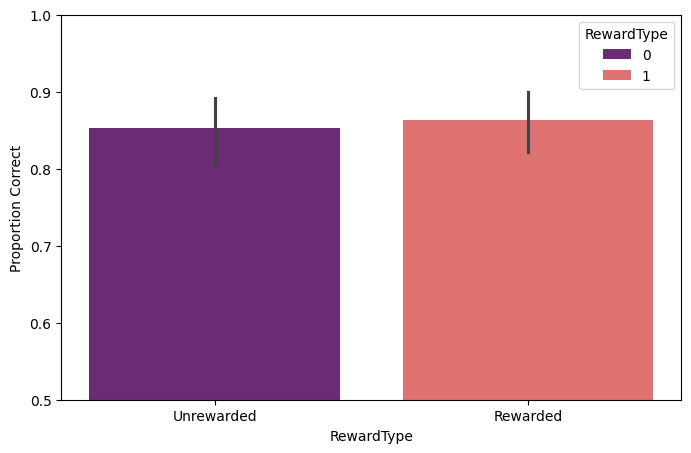

In [ ]:
# Create data sets for rewarded and unrewarded RTs
plt.figure(figsize=(8,5))
plot_data = Transfer_df_clean_Acc.groupby(['RewardType','Subject'])['Acc'].mean().reset_index()

ax = sns.barplot(x='RewardType', y='Acc', hue = 'RewardType',data=plot_data, palette='magma');

Mns = Transfer_df_clean_Acc.groupby('RewardType')['Acc'].mean()
# Calculate and plot means
means = Transfer_df_clean_Acc.groupby('RewardType')['Acc'].mean()

# Reorder means
means = means.reindex(['U', 'W','R'])

for i, mean in enumerate(means):
    ax.plot(i, mean, marker='o', color='red', markersize=8)

ax.set_xticks([0, 1]);
ax.set_xticklabels(["Unrewarded","Rewarded"])
ax.set_ylabel('Proportion Correct');
plt.ylim(0.5,1);

In [ ]:
# Determine whether normality assumption is valid

#### Assumption 1: Normality
from scipy import stats

#### find the p-value of the Shapiro-Wilks test
w_shapiro_transfer_acc, p_value_shapiro_transfer_acc = stats.shapiro(Transfer_df_clean_Acc['Acc'])
print('Because the p-value is ', round(p_value_shapiro_transfer_acc,8),"...", sep = '')

if p_value_shapiro_transfer_acc < 0.05:
  print("We reject the null hypothesis that accuracy data are normally distributed.")
else:
  print('We fail the reject the null hypothesis that accuracy data are normally distributed.')

Because the p-value is 0.0...
We reject the null hypothesis that accuracy data are normally distributed.


In [ ]:
# Determine whether homogeneity of variances assumption is valid

#### Assumption 2: Homogeneity of Variance
from scipy.stats import levene
statistic_levenes_transfer_acc, p_value_levenes_transfer_acc = levene( Transfer_df_clean_Acc['Acc'][Transfer_df_clean_Acc['RewardType']==0],
                                                                       Transfer_df_clean_Acc['Acc'][Transfer_df_clean_Acc['RewardType']==1]);
#### find the p-value of Levene's test
print('Because the p-value is ', round(p_value_levenes_transfer_acc,7),"...", sep = '')

if p_value_levenes_transfer_acc < 0.05:
  print("We reject the null hypothesis that the population variances are equal between reward types.")
else:
  print('We fail to reject the null hypothesis that the population variances are equal between reward types.')

Because the p-value is 0.846504...
We fail to reject the null hypothesis that the population variances are equal between reward types.


In [ ]:
# Significance testing using one-way ANOVA

from scipy.stats import f_oneway

reward_acc = Transfer_df_clean_Acc['Acc'][Transfer_df_clean_Acc['RewardType']==1]
unreward_acc = Transfer_df_clean_Acc['Acc'][Transfer_df_clean_Acc['RewardType']==0]

# calculate the p-value using the one-way ANOVA test
anova_f_transfer_acc, anova_p_transfer_acc = f_oneway(reward, unreward)
print("The F-statistic is ", round(anova_f_transfer_acc,3), " and the p-value is ", round(anova_p_transfer_acc,8),".",sep="")

The F-statistic is 10.839 and the p-value is 0.00101116.


In [ ]:
# Non-parametric test because data are not normally distributed
pg.welch_anova(dv='Acc', between='RewardType', data=Transfer_df_clean_Acc)

# Not significant

,Source,ddof1,ddof2,F,p-unc,np2
0,RewardType,1,2289.8089,0.037497,0.846473,0.000016


Result: Rewarded chords were performed more accurately than withheld or unrewarded chords.

## Questionnaire

### Reaction Time Data

In [ ]:
# Organize reward effects
All_Rs = Transfer_df_clean_RT[Transfer_df_clean_RT['RewardType']==1].groupby(Transfer_df_clean_RT['Subject'])['RT'].mean()
All_Us = Transfer_df_clean_RT[Transfer_df_clean_RT['RewardType']==0].groupby(Transfer_df_clean_RT['Subject'])['RT'].mean()
REffect = All_Rs - All_Us

In [ ]:
# Organize recall and composite awareness
Only_Q = df_nr[df_nr['Block'] == 12]
cAware_data = Only_Q.groupby(Only_Q['Subject'])['Composite Awareness'].mean()
cAware_data = cAware_data.fillna(0)
recall_data = Only_Q.groupby(Only_Q['Subject'])['QRecall'].mean()
recall_data = recall_data.fillna(0)

Because the p-value is 0.00456238...
We reject the null hypothesis that recall is NOT above chance.


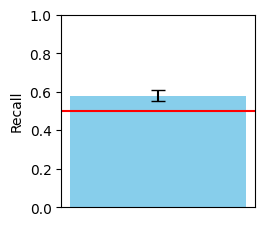

In [ ]:
# Plot recall in relation to chance
plt.figure(figsize=(2.5,2.5))
errors = np.std(recall_data) / np.sqrt(df_nr['Subject'].unique().size)
plt.bar(1,recall_data.mean(), color='skyblue',yerr=errors, capsize=5)
plt.ylabel('Recall');
plt.xlabel(' ');
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.ylim(0,1);

# Test if recall is above chance
from scipy import stats

statistic, pvalue = stats.ttest_1samp(recall_data, 0.5, alternative ='greater')
print('Because the p-value is ', round(pvalue,8),"...", sep = '')
if pvalue < 0.05:
  print("We reject the null hypothesis that recall is NOT above chance.")
else:
  print('We fail the reject the null hypothesis that recall is NOT above chance.')

In [ ]:
# Correlations between reward effects, recall, and composite awareness
Q_Data = pd.DataFrame({'Reward Effect': REffect, 'Recall': recall_data, 'Composite Awareness': cAware_data})
Q_Data.corr()

,Reward Effect,Recall,Composite Awareness
Reward Effect,1.000000,-0.149450,0.002616
Recall,-0.149450,1.000000,0.471168
Composite Awareness,0.002616,0.471168,1.000000


In [ ]:
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(REffect, recall_data)
print("Recall and reward effect: The Pearson correlation coefficient is ", round(pearson_corr,3), " and the p-value is ", round(p_value,8),".",sep="")

pearson_corr, p_value = pearsonr(REffect, cAware_data)
print("Composite awareness and reward effect: The Pearson correlation coefficient is ", round(pearson_corr,3), " and the p-value is ", round(p_value,8),".",sep="")

# Recall was above chance but not associated with reward learning on RT

Recall and reward effect: The Pearson correlation coefficient is -0.149 and the p-value is 0.31603766.
Composite awareness and reward effect: The Pearson correlation coefficient is 0.003 and the p-value is 0.98607753.


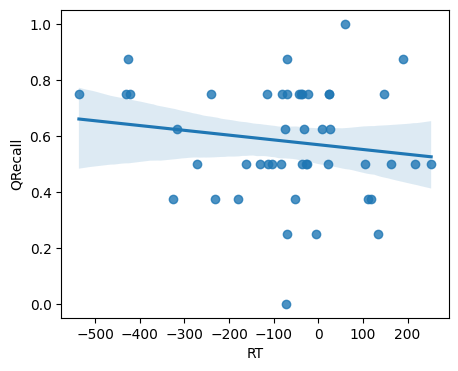

In [ ]:
# Scatter plots - recall
plt.figure(figsize=(5.0,4.0))
sns.regplot(x=REffect, y=recall_data)
plt.show()

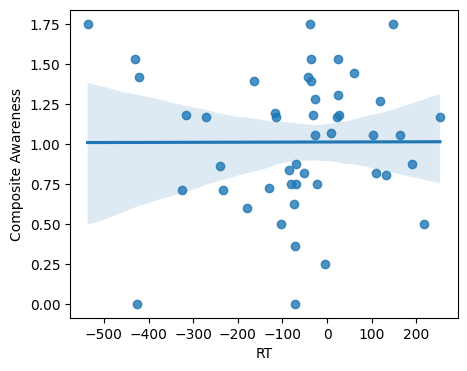

In [ ]:
# Scatter plots - cAware
plt.figure(figsize=(5.0,4.0))
sns.regplot(x=REffect, y=cAware_data)
plt.show()